<a href="https://colab.research.google.com/github/pedrohortencio/machine-learning-gladiator/blob/main/Fashion%20MNIST/Fashion_MNIST_Gladiator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [15]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

sns.set_theme()

In [19]:
dict_acc = {}

## Downloading and splitting dataset 

In [2]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


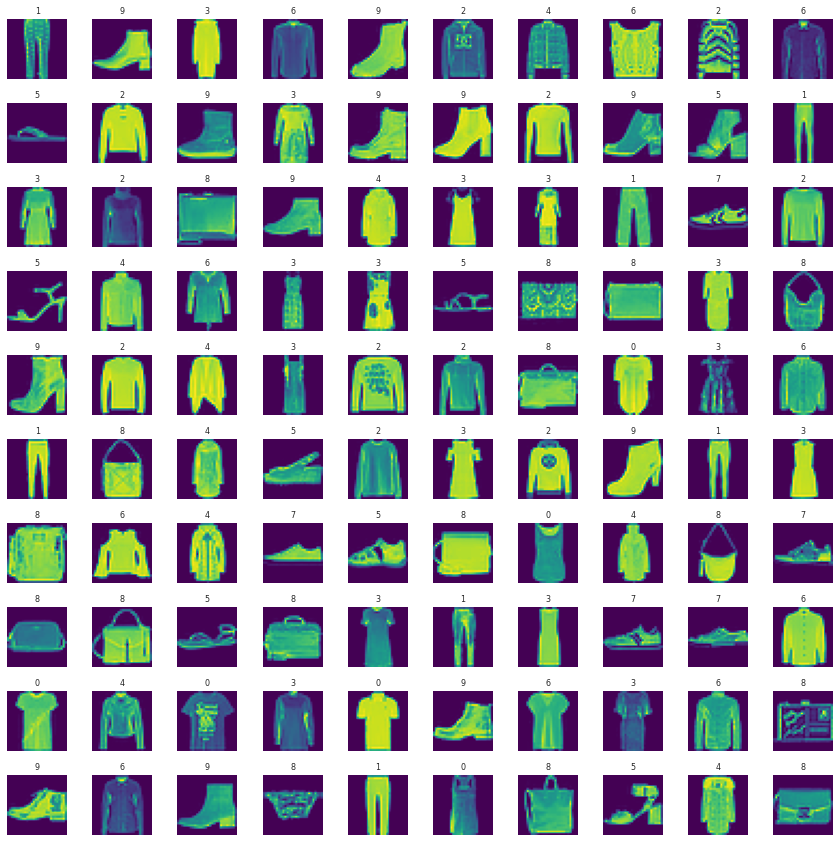

In [14]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

#fig.patch.set_facecolor('whitesmoke')

axes = axes.ravel()
n_training = len(X_train) 

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index], cmap='viridis')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [16]:
(X_train, X_validation,
 y_train, y_validation) = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [17]:
print("Train dataset")
print(X_train.shape)
print(y_train.shape)
print("Validation dataset")
print(X_validation.shape)
print(y_validation.shape)
print("Test dataset")
print(X_test.shape)
print(y_test.shape)

Train dataset
(54000, 28, 28)
(54000,)
Validation dataset
(6000, 28, 28)
(6000,)
Test dataset
(10000, 28, 28)
(10000,)


In [18]:
X_train = X_train / 255
X_validation = X_validation / 255
X_test = X_test / 255

## Models

###Deep Neural Network

In [26]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.5e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.0e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.4),
                                    
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.0e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.3), 
                                    
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.5e-5, l2=0.5e-4)), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [27]:
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [28]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

dnn_history = model.fit(X_train, y_train, batch_size = 500, epochs=100, callbacks=loss_callback, validation_data=(X_validation, y_validation))

Epoch 1/100
108/108 [==============================] - 5s 44ms/step - loss: 1.6976 - accuracy: 0.5175 - val_loss: 0.8269 - val_accuracy: 0.8077
Epoch 2/100
108/108 [==============================] - 4s 41ms/step - loss: 0.8561 - accuracy: 0.8068 - val_loss: 0.7022 - val_accuracy: 0.8508
Epoch 3/100
108/108 [==============================] - 4s 41ms/step - loss: 0.7616 - accuracy: 0.8290 - val_loss: 0.6569 - val_accuracy: 0.8572
Epoch 4/100
108/108 [==============================] - 4s 41ms/step - loss: 0.7078 - accuracy: 0.8397 - val_loss: 0.6146 - val_accuracy: 0.8660
Epoch 5/100
108/108 [==============================] - 4s 41ms/step - loss: 0.6677 - accuracy: 0.8502 - val_loss: 0.5975 - val_accuracy: 0.8652
Epoch 6/100
108/108 [==============================] - 4s 41ms/step - loss: 0.6450 - accuracy: 0.8502 - val_loss: 0.5694 - val_accuracy: 0.8718
Epoch 7/100
108/108 [==============================] - 4s 41ms/step - loss: 0.6215 - accuracy: 0.8554 - val_loss: 0.5582 - val_accuracy:

In [36]:
dnn_stats = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4670 - accuracy: 0.8785


In [39]:
test_acc = dnn_stats[-1]
validation_acc = dnn_history.history['val_accuracy'][-1]

dict_acc['DNN'] = [validation_acc, test_acc]

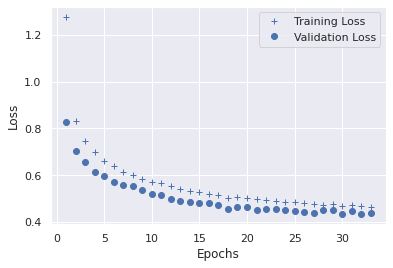

In [33]:
epochs = range(1, len(dnn_history.history['loss'])+1)
training_loss = dnn_history.history['loss']
validation_loss = dnn_history.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

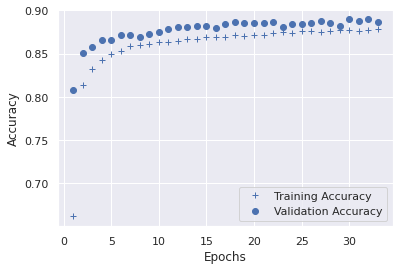

In [34]:
epochs = range(1, len(dnn_history.history['loss'])+1)
training_acc = dnn_history.history['accuracy']
validation_acc = dnn_history.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Convolutional Neural Network